## Preprocessing

In [13]:
import scanpy as sc
import pandas as pd
import numpy as np

from pre_processing import preprocess

from main import *
from poincare_maps import *

%matplotlib inline

In [14]:
data=pd.read_csv("C:\\Users\\xiang\\OneDrive\\Documents\\M2R project\\GSE92332_AtlasFullLength_TPM.txt",sep="\t").T
data = preprocess(data)
df = pd.DataFrame(data=data.X, index=data.obs['celltype'], columns=list(data.var_names))
df['labels']= df.index
df

Number of cells after doublet removal: 1507
Number of cells after quality control: 1415


,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6,labels
celltype,,,,,,,,,,,,,,,,,,,,,
Enterocyte,1.207489,0.143038,0.675072,1.979412,-0.130147,0.283002,-0.786716,-0.357912,-0.920620,-0.463089,...,-0.246491,0.264354,-0.189592,-0.089110,-0.192937,-0.137270,2.781530,-0.627408,-0.934471,Enterocyte
Stem,-0.680341,1.651723,-1.422705,-0.189374,-0.128320,-0.782706,-0.444607,-0.355484,0.699752,2.805945,...,-0.175216,-0.170411,0.665807,-0.088746,0.711883,-0.457151,-0.443399,-0.626520,0.111856,Stem
Stem,-0.455369,0.110578,-1.416919,-0.182215,-0.123401,0.577528,1.524868,-0.348953,0.759891,0.153339,...,-0.246894,-0.163819,-0.312624,-0.087768,-0.610900,-0.607055,0.329498,-0.582959,0.186237,Stem
Goblet,-0.685344,1.572891,1.189975,-0.177432,-0.120115,0.380531,-0.547665,-0.344590,2.300411,-0.514893,...,-0.247090,-0.159416,-0.305527,-0.087114,-0.059930,-0.598468,1.598246,-0.622534,-0.183312,Goblet
Goblet,0.408923,0.646357,0.218797,-0.186935,-0.126643,0.357458,0.190952,-0.353259,-0.921569,-0.518258,...,-0.120264,-0.168165,-0.319629,-0.088413,-0.585024,-0.615529,0.471713,0.429649,-1.095886,Goblet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuft-2,-0.597836,-0.904996,0.834460,-0.386286,-0.263603,-1.072716,0.923291,5.586446,-0.914659,-0.579926,...,-0.238524,-0.351716,-0.615480,-0.115660,0.220798,-0.973444,-0.917951,-0.692244,-1.226220,Tuft-2
Tuft-1,-0.655013,-0.794954,-1.471555,-0.249824,-0.169850,1.797775,1.382673,-0.410631,-0.963472,-0.540529,...,-0.244121,-0.226069,-0.412961,-0.097008,2.574003,-0.603127,-0.808934,1.068424,-0.134125,Tuft-1
Tuft-2,-0.634228,-0.834956,-1.511642,-0.299430,-0.203931,-1.068543,-1.677300,-0.455886,-0.462519,-0.558096,...,-0.242086,-0.271744,-0.486580,-0.103789,-0.618818,-0.817503,-0.499685,1.584439,-1.169435,Tuft-2


In [15]:
features, labels = prepare_data(df, 
                                with_labels=True, 
                                normalize=True, 
                                n_pca=50)

Computing laplacian...
Laplacian computed in 0.16 sec
Computing RFA matrix...
RFA matrix computed in 0.20 sec
batchsize =  141
Starting training...


loss: 0.43711: 100%|████████████████████████| 1000/1000 [08:57<00:00,  1.86it/s]


PM computed in 537.66 sec


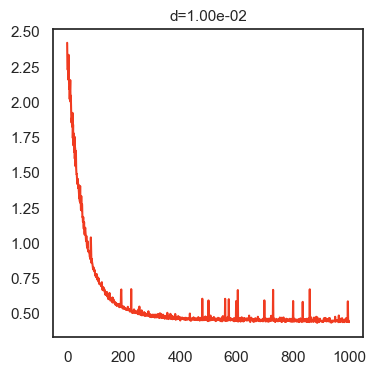

loss = 4.371e-01
time = 8.967 min


<Figure size 640x480 with 0 Axes>

In [16]:
# Compute the Embedding
poincare_coord, _ = compute_poincare_maps(features, labels,
                        'results/example',
                        mode='features', k_neighbours=15, 
                        distlocal='minkowski', sigma=2.0, gamma=1.5,
                        color_dict=None, epochs=1000,
                        batchsize=-1, lr=0.1, earlystop=0.0001, cuda=0)

poincare_coord
np.savetxt('results/example.csv', poincare_coord, delimiter=",")

In [5]:
li = len(np.unique(labels))
c = [list(labels).count(x) for x in np.unique(labels)]
for i in range(li):
    print(f'{np.unique(labels)[i]}: {c[i]}')

Endocrine: 29
Enterocyte: 146
Enterocyte-Progenitor-Early: 106
Enterocyte-Progenitor-Late: 66
Goblet: 116
Paneth: 75
Stem: 599
TA: 190
Tuft: 1
Tuft-1: 42
Tuft-2: 45


## Visualization of data after Poincaré Embedding

IndexError: list index out of range

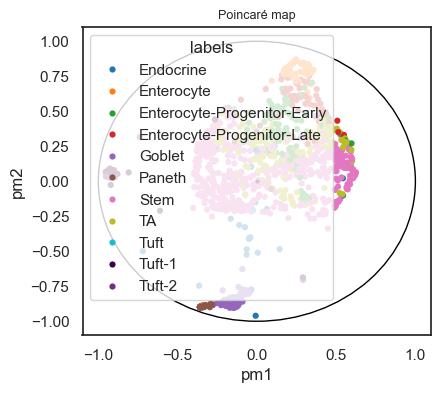

In [17]:
poincare_coord = np.loadtxt('results/example.csv', delimiter=",")
model = PoincareMaps(poincare_coord)
model.plot('ori', labels=labels, file_name='results/example', 
           title_name='Poincaré map', 
           coldict=None, 
           labels_order=None, 
           print_labels = False,
           zoom=None, bbox=(0.1, 0.1))

In [7]:
print("Default title font size:", plt.rcParams['axes.titlesize'])
print("Default axis label font size:", plt.rcParams['axes.labelsize'])

Default title font size: 12.0
Default axis label font size: 12.0


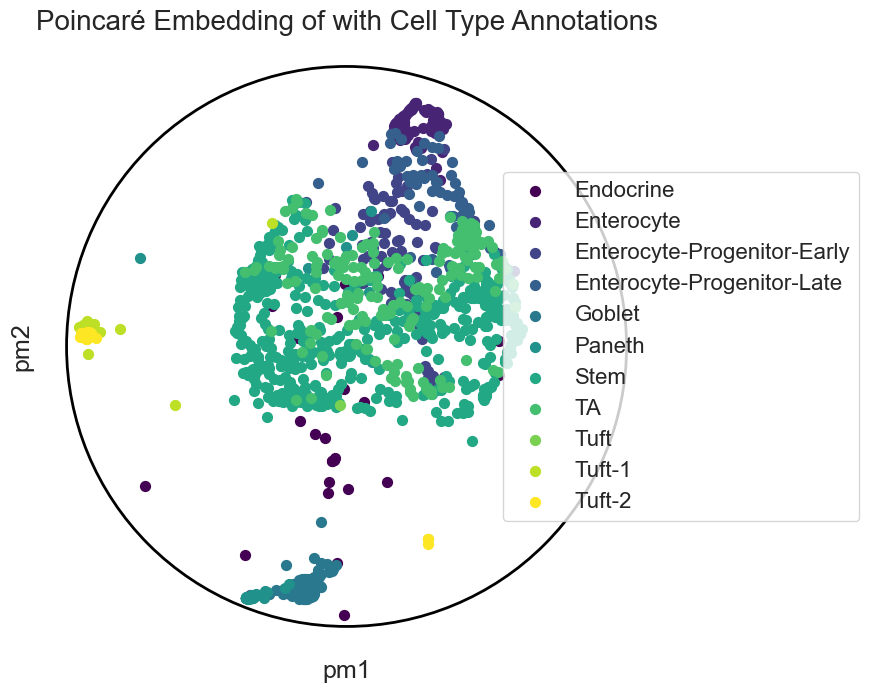

In [23]:
from matplotlib.patches import Circle
def plot_on_disk(poincare_coord, cluster_labels):
    # Create a figure and a single subplot with equal aspect ratio
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot the data points with different colors for each cluster
    unique_labels = np.unique(cluster_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        ax.scatter(poincare_coord[cluster_labels == label, 0], 
                   poincare_coord[cluster_labels == label, 1], 
                   c=[color], label=label, cmap='viridis', s=50)

    # Add a circular border
    circle = Circle((0, 0), 1, edgecolor='black', facecolor='none', lw=2)
    ax.add_patch(circle)

    # Set limits to make sure the plot is within the disk
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    # Add title and labels
    ax.set_title('Poincaré Embedding of with Cell Type Annotations', fontsize=20)
    ax.set_xlabel('pm1', fontsize=18)
    ax.set_ylabel('pm2', fontsize=18)

    # Add legend with points of color
    ax.legend(loc= 'right', markerscale=1, fontsize=16, bbox_to_anchor=(1.35, 0.5))

    # Hide the square plot border
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()


clustering = AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')
cluster_labels = clustering.fit_predict(poincare_coord)
plot_on_disk(poincare_coord, labels)

## Clustering on Poincaré Embedding

Hierarchical(agglomerative), Spectral, and K-means clustering on the Poincaré embedding.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib.patches import Circle

In [26]:
# Load your Poincaré embedding coordinates from a CSV file
poincare_coord = pd.read_csv('results/example.csv').values


#### Agglomerative Clustering

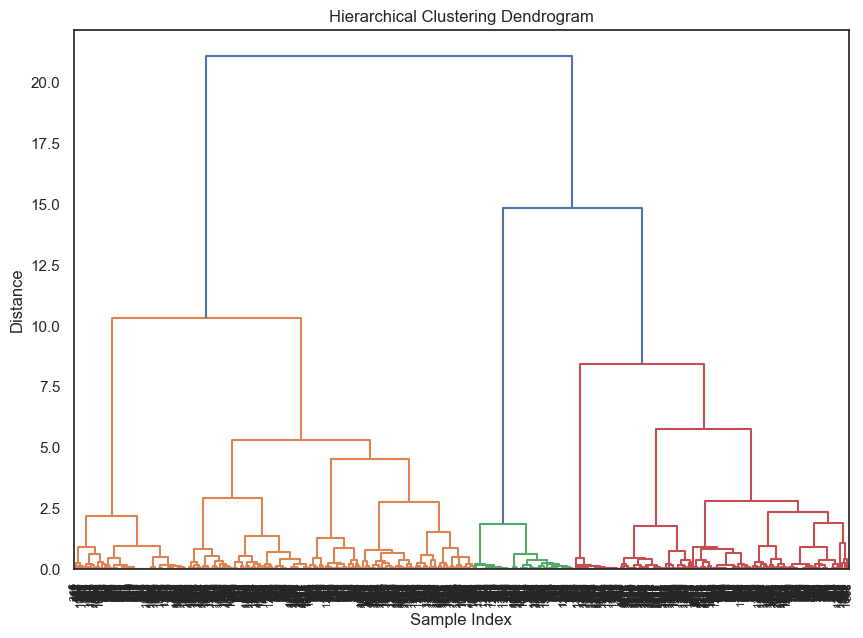

In [20]:
def agglomerative_clustering(poincare_coord, n_clusters=11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clustering.fit_predict(poincare_coord)
    
    # Create dendrogram
    Z = linkage(poincare_coord, 'ward')
    plt.figure(figsize=(10, 7))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.show()
    
    return cluster_labels

agglo_labels = agglomerative_clustering(poincare_coord, n_clusters=13)

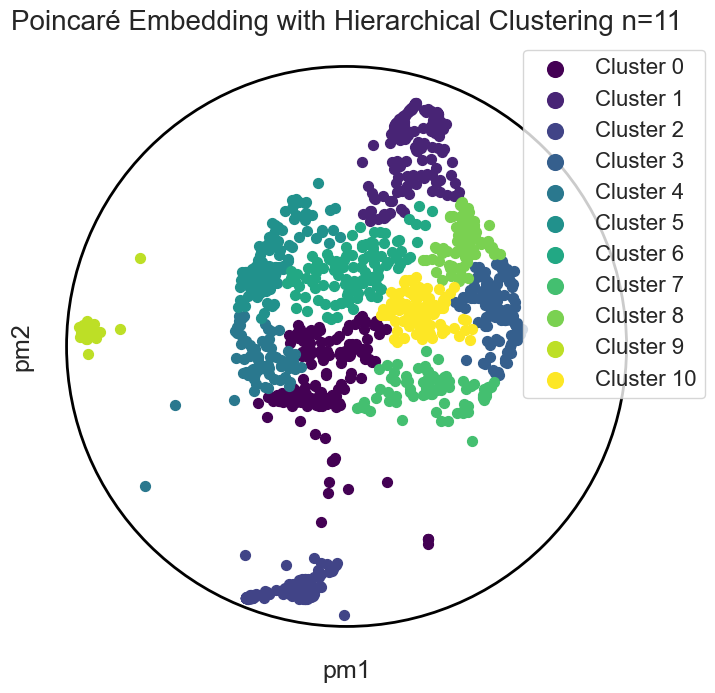

In [30]:
def plot_on_disk(poincare_coord, cluster_labels):
    # Create a figure and a single subplot with equal aspect ratio
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot the data points with different colors for each cluster
    unique_labels = np.unique(cluster_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        ax.scatter(poincare_coord[cluster_labels == label, 0], 
                   poincare_coord[cluster_labels == label, 1], 
                   c=[color], label=f'Cluster {label}', cmap='viridis', s=50)

    # Add a circular border
    circle = Circle((0, 0), 1, edgecolor='black', facecolor='none', lw=2)
    ax.add_patch(circle)

    # Set limits to make sure the plot is within the disk
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    # Add title and labels
    ax.set_title('Poincaré Embedding with Hierarchical Clustering n=11', fontsize=20)
    ax.set_xlabel('pm1', fontsize=18)
    ax.set_ylabel('pm2', fontsize=18)

    # Add legend with points of color
    ax.legend(loc='upper right', markerscale=1.6, fontsize=16,  bbox_to_anchor=(1.1, 1))

    # Hide the square plot border
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()


clustering = AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')
cluster_labels = clustering.fit_predict(poincare_coord)
plot_on_disk(poincare_coord, cluster_labels)

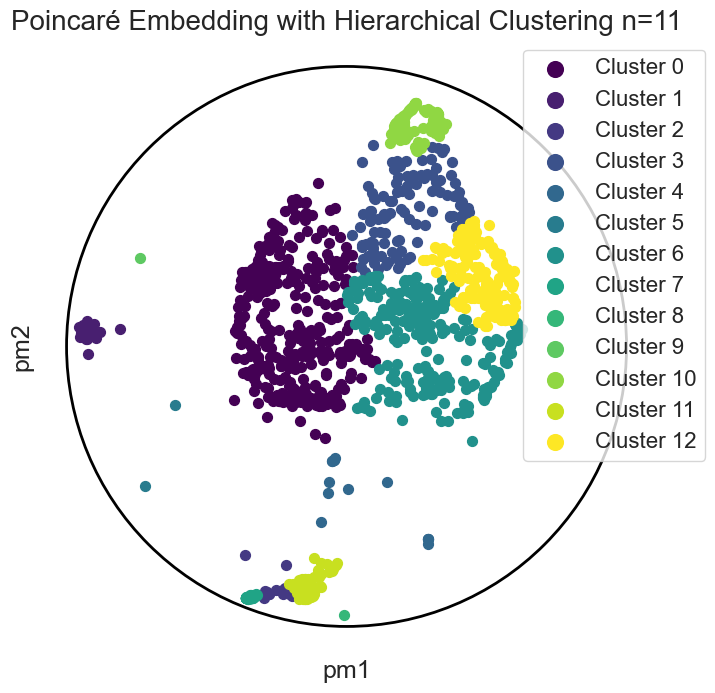

In [48]:
from sklearn.metrics.pairwise import pairwise_distances

def poincare_distance(x, y):
    norm_x_sq = np.dot(x, x)
    norm_y_sq = np.dot(y, y)
    dist_sq = np.dot(x - y, x - y)
    denominator = (1 - norm_x_sq) * (1 - norm_y_sq)
    fraction = 2 * dist_sq / denominator
    poincare_dist = np.arccosh(1 + fraction)

    return poincare_dist


def agglomerative_clustering_poincare(poincare_coord, n_clusters=11):
    distances = pairwise_distances(poincare_coord, metric=poincare_distance)
    
    # Perform clustering using precomputed distances and 'average' linkage
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='complete')
    cluster_labels = clustering.fit_predict(distances)
    
    return cluster_labels


poincare_labels = agglomerative_clustering_poincare(poincare_coord, n_clusters=13)
plot_on_disk(poincare_coord, poincare_labels)

## Spectral Clustering

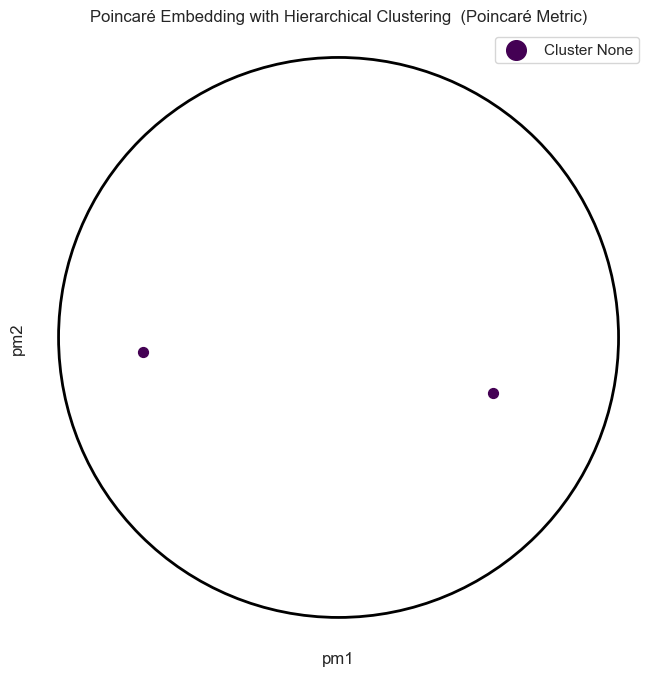

In [51]:
def spectral_clustering(poincare_coord, n_clusters=11):
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
    cluster_labels = clustering.fit_predict(poincare_coord)

spectral_labels = spectral_clustering(poincare_coord, n_clusters=11)
plot_on_disk(poincare_coord, spectral_labels)

## K-Means Clustering

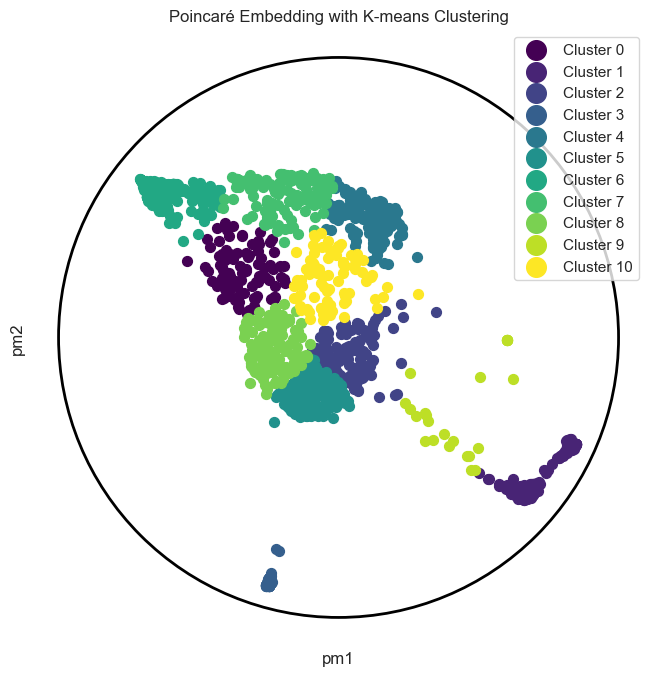

In [55]:
def kmeans_clustering(poincare_coord, n_clusters=11):
    clustering = KMeans(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(poincare_coord)
    
    return cluster_labels

kmeans_labels = kmeans_clustering(poincare_coord, n_clusters=11)
plot_on_disk(poincare_coord, kmeans_labels)

## Scores and Evaluation

In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(poincare_coord, cluster_labels, metric='euclidean')
db_index = davies_bouldin_score(poincare_coord, cluster_labels)
print(f'Silhouette Score for Hierarchical clustering in Poincare metric: {sil_score}')
print(f'Davies-Bouldin Index for Hierarchical clustering in Poincare metric: {db_index}')

Silhouette Score for Hierarchical clustering in Poincare metric: 0.4925959705385337
Davies-Bouldin Index for Hierarchical clustering in Poincare metric: 0.6833102108968744


In [52]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(poincare_coord, poincare_labels, metric=poincare_distance)

silhouette_dict = {}

for i in range(13): 
    print(f"Silhouette score for cluster {i}:")
    silhouette_dict[i] = silhouette_vals[poincare_labels == i].mean()
    print(silhouette_dict[i])

# Function to create a silhouette bar plot
def createSilhouetteBar(silhouette_dict):
    # Sort clusters by silhouette score
    clusters = list(silhouette_dict.keys())
    scores = list(silhouette_dict.values())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(clusters, scores, color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Scores for Poincaré')
    plt.show()


Silhouette score for cluster 0:
0.39578350040943255
Silhouette score for cluster 1:
0.85813372915498
Silhouette score for cluster 2:
0.3797878514111144
Silhouette score for cluster 3:
0.32378216773962715
Silhouette score for cluster 4:
0.5001623351753303
Silhouette score for cluster 5:
0.14678369944176634
Silhouette score for cluster 6:
0.1933119685229873
Silhouette score for cluster 7:
0.7888411501109804
Silhouette score for cluster 8:
0.0
Silhouette score for cluster 9:
0.0
Silhouette score for cluster 10:
0.5524985012559327
Silhouette score for cluster 11:
0.5039295283406325
Silhouette score for cluster 12:
0.4084047627801965


In [54]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(poincare_coord, poincare_labels, metric='euclidean')

silhouette_dict = {}

for i in range(13): 
    print(f"Silhouette score for cluster {i}:")
    silhouette_dict[i] = silhouette_vals[poincare_labels == i].mean()
    print(silhouette_dict[i])

# Function to create a silhouette bar plot
def createSilhouetteBar(silhouette_dict):
    # Sort clusters by silhouette score
    clusters = list(silhouette_dict.keys())
    scores = list(silhouette_dict.values())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(clusters, scores, color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Scores for Poincaré')
    plt.show()


Silhouette score for cluster 0:
0.2688890078896134
Silhouette score for cluster 1:
0.925845493093002
Silhouette score for cluster 2:
0.3447906598471026
Silhouette score for cluster 3:
0.22663880656439925
Silhouette score for cluster 4:
0.40200768718921626
Silhouette score for cluster 5:
0.33815283094963994
Silhouette score for cluster 6:
0.12856802580358087
Silhouette score for cluster 7:
0.8811003669520878
Silhouette score for cluster 8:
0.0
Silhouette score for cluster 9:
0.0
Silhouette score for cluster 10:
0.7395069048442551
Silhouette score for cluster 11:
0.43162292006713177
Silhouette score for cluster 12:
0.45465633243653536


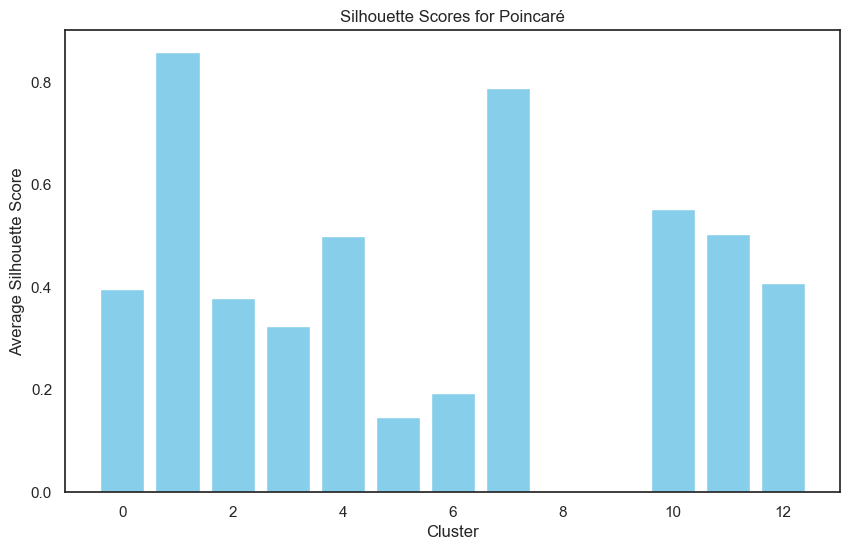

In [53]:
createSilhouetteBar(silhouette_dict)

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(poincare_coord, poincare_labels, metric='euclidean')
db_index = davies_bouldin_score(poincare_coord, poincare_labels)
print(f'Silhouette Score for Hierarchical clustering in Poincare metric: {sil_score}')
print(f'Davies-Bouldin Index for Hierarchical clustering in Poincare metric: {db_index}')

Silhouette Score for Hierarchical clustering in Poincare metric: 0.503210414311959
Davies-Bouldin Index for Hierarchical clustering in Poincare metric: 0.6684060621812439


In [41]:
sil_score = silhouette_score(poincare_coord, spectral_labels, metric='euclidean')
db_index = davies_bouldin_score(poincare_coord, spectral_labels)
print(f'Silhouette Score for K-means clustering in Euclidean metric: {sil_score}')
print(f'Davies-Bouldin Index for K-means clustering in Euclidean metric: {db_index}')

InvalidParameterError: The 'labels' parameter of silhouette_score must be an array-like. Got None instead.

In [43]:
sil_score = silhouette_score(poincare_coord, kmeans_labels, metric=poincare_distance)
db_index = davies_bouldin_score(poincare_coord, kmeans_labels)
print(f'Silhouette Score for K-means clustering in Euclidean metric: {sil_score}')
print(f'Davies-Bouldin Index for K-means clustering in Euclidean metric: {db_index}')

Silhouette Score for K-means clustering in Euclidean metric: 0.4854319391839935
Davies-Bouldin Index for K-means clustering in Euclidean metric: 0.7159574917501867
